In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import scipy.sparse as sp
from tqdm import tqdm
import matplotlib.pyplot as plt 

In [2]:
%%time 
adata = sc.read_h5ad("../../perturb-cite-seq/SCP1064/other/adata.h5ad")
adata.X.data

CPU times: user 1.23 s, sys: 5.08 s, total: 6.31 s
Wall time: 11.9 s


array([2., 1., 1., ..., 2., 1., 1.])

In [3]:
sc.pp.filter_cells(adata, min_genes=0)
sc.pp.filter_genes(adata, min_cells=0)

In [4]:
for val in adata.obs[["sgRNA", "sgRNAs"]].value_counts().to_frame().iterrows():
    print(val[0], val[1])

('IFNGR2_2', 'IFNGR2_2') 0    358
Name: (IFNGR2_2, IFNGR2_2), dtype: int64
('NO_SITE_47', 'NO_SITE_47') 0    333
Name: (NO_SITE_47, NO_SITE_47), dtype: int64
('NO_SITE_913', 'NO_SITE_913') 0    317
Name: (NO_SITE_913, NO_SITE_913), dtype: int64
('HLA-DRB5_2', 'HLA-DRB5_2') 0    315
Name: (HLA-DRB5_2, HLA-DRB5_2), dtype: int64
('NO_SITE_23', 'NO_SITE_23') 0    296
Name: (NO_SITE_23, NO_SITE_23), dtype: int64
('NO_SITE_36', 'NO_SITE_36') 0    296
Name: (NO_SITE_36, NO_SITE_36), dtype: int64
('ONE_NON-GENE_SITE_531', 'ONE_NON-GENE_SITE_531') 0    296
Name: (ONE_NON-GENE_SITE_531, ONE_NON-GENE_SITE_531), dtype: int64
('CD59_2', 'CD59_2') 0    287
Name: (CD59_2, CD59_2), dtype: int64
('FGFR1_1', 'FGFR1_1') 0    285
Name: (FGFR1_1, FGFR1_1), dtype: int64
('JAK2_1', 'JAK2_1') 0    285
Name: (JAK2_1, JAK2_1), dtype: int64
('JMJD7_1', 'JMJD7_1') 0    283
Name: (JMJD7_1, JMJD7_1), dtype: int64
('JAK1_2', 'JAK1_2') 0    283
Name: (JAK1_2, JAK1_2), dtype: int64
('NO_SITE_678', 'NO_SITE_678') 0    

('E2F1_1', 'E2F1_1') 0    88
Name: (E2F1_1, E2F1_1), dtype: int64
('DDX39A_1', 'DDX39A_1') 0    88
Name: (DDX39A_1, DDX39A_1), dtype: int64
('HLA-DRB5_3', 'HLA-DRB5_3') 0    86
Name: (HLA-DRB5_3, HLA-DRB5_3), dtype: int64
('HASPIN_2', 'HASPIN_2') 0    86
Name: (HASPIN_2, HASPIN_2), dtype: int64
('FRZB_3', 'FRZB_3') 0    85
Name: (FRZB_3, FRZB_3), dtype: int64
('NCL_3', 'NCL_3') 0    85
Name: (NCL_3, NCL_3), dtype: int64
('ST3GAL6-AS1_1', 'ST3GAL6-AS1_1') 0    84
Name: (ST3GAL6-AS1_1, ST3GAL6-AS1_1), dtype: int64
('SINHCAF_1', 'SINHCAF_1') 0    84
Name: (SINHCAF_1, SINHCAF_1), dtype: int64
('CST3_3', 'CST3_3') 0    84
Name: (CST3_3, CST3_3), dtype: int64
('CDK6_1', 'CDK6_1') 0    84
Name: (CDK6_1, CDK6_1), dtype: int64
('ACSL3_1', 'ACSL3_1') 0    83
Name: (ACSL3_1, ACSL3_1), dtype: int64
('NDUFA13_2', 'NDUFA13_2') 0    83
Name: (NDUFA13_2, NDUFA13_2), dtype: int64
('GSEC_3', 'GSEC_3') 0    83
Name: (GSEC_3, GSEC_3), dtype: int64
('TIMP2_2', 'TIMP2_2') 0    82
Name: (TIMP2_2, TIMP2_2), d

In [5]:
(adata.obs["n_genes"] < 500).sum(), (adata.var["n_cells"] < 500).sum()

(304, 8376)

In [6]:
sc.pp.filter_cells(adata, min_genes=500)
sc.pp.filter_genes(adata, min_cells=500)

In [7]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e5)
sc.pp.log1p(adata)

In [8]:
# make sure we can match sgRNAs back to the genes
adata.obs

,library_preparation_protocol,condition,MOI,sgRNA,UMI_count,sgRNAs,n_genes
NAME,,,,,,,
CELL_1,10X 3' v3 sequencing,Control,1,HLA-B_2,10832.0,HLA-B_2,3520
CELL_2,10X 3' v3 sequencing,Control,2,NaN,10731.0,"NGFR_3,SERPINF1_3",3531
CELL_3,10X 3' v3 sequencing,Control,1,HLA-B_2,28821.0,HLA-B_2,5541
CELL_4,10X 3' v3 sequencing,Control,2,NaN,15322.0,"NMRK1_3,S100A6_3",4086
CELL_5,10X 3' v3 sequencing,Control,0,NaN,10314.0,,3178
...,...,...,...,...,...,...,...
CELL_218327,10X 3' v3 sequencing,Co-culture,4,NaN,12722.0,"CTSO_3,PIK3IP1_3,VDAC2_2,WNT7A_1",3686
CELL_218328,10X 3' v3 sequencing,Co-culture,2,NaN,11643.0,"JAK2_3,SLC7A5P1_3",3462
CELL_218329,10X 3' v3 sequencing,Co-culture,3,NaN,12497.0,"S100A6_2,SAT1_2,ONE_NON-GENE_SITE_177",3768


In [9]:
# check if the field MOI has some irregularities, such that a truncated guide or a wrong number
ind = []
for index, row in tqdm(adata.obs.iterrows(), total=adata.n_obs):
    flag = False
    if row["sgRNAs"] != "":
        guides = row["sgRNAs"].split(",")
        if len(guides) != row["MOI"]:
            flag = True
        if "_" not in guides[-1]:
            flag = True
    if flag:
        ind += [index]

100%|██████████| 218027/218027 [00:10<00:00, 20341.53it/s]


In [10]:
# empty!!
ind

[]

In [11]:
# check gene sets and ensure matching with measurements
err = 0
ind = []
obs_genes = {}
unfound_genes = {}
targets = []
for index, row in tqdm(adata.obs.iterrows(), total=adata.n_obs):
    current_target = []
    if row["sgRNAs"] != "":
        # get all guides in cells
        sg = row["sgRNAs"].split(",")
        # get gene name by stripping guide specific info
        sg_genes = [guide.rsplit("_", maxsplit=1)[0] for guide in sg]
        for gene in sg_genes:
            if gene in adata.var.index:
                # gene is found
                current_target += [gene]
                if gene not in obs_genes:
                    obs_genes[gene] = 1
                else:
                    obs_genes[gene] += 1
            else:
                if gene not in unfound_genes:
                    unfound_genes[gene] = 1
                else:
                    unfound_genes[gene] += 1
    # end gene list
    targets += [",".join(current_target)]

100%|██████████| 218027/218027 [00:11<00:00, 19325.81it/s]


In [12]:
# create regimes
regimes = np.unique(targets, return_inverse=True)[1]

In [13]:
len(regimes)

218027

In [14]:
adata.obs["targets"] = targets
adata.obs["regimes"] = regimes

In [15]:
len(obs_genes.keys())

220

In [16]:
# some leftover genes I couldn't match
unfound_genes.keys()

dict_keys(['NGFR', 'SERPINF1', 'CSPG4', 'PIK3IP1', 'ONE_NON-GENE_SITE', 'NO_SITE', 'NUP50-AS1', 'IDI2-AS1', 'CXCR4', 'JMJD7', 'TYR', 'BOLA2', 'LRRC75A-AS1', 'LINC00518', 'APOD', 'A2M', 'LEF1-AS1', 'SLC7A5P1', 'SERPINA3', 'WNT7A', 'GAS5', 'IRF4', 'APOC2', 'XAGE1A', 'CCND2', 'CDH19', 'ST6GALNAC2', 'S100B', 'HLA-H', 'SNHG6'])

## Step 2: Comparing variability of gene expression to guide ID

In [17]:
%%time
sc.pp.highly_variable_genes(adata, layer="counts", flavor='seurat_v3', n_top_genes=3000 , span=0.2)

CPU times: user 35.4 s, sys: 10.2 s, total: 45.6 s
Wall time: 51.7 s


In [18]:
adata.var

,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm
A1BG,34703,True,1689.0,0.189256,0.232778,1.069112
A1BG-AS1,12461,False,NaN,0.060226,0.063213,0.964280
A4GALT,1537,False,NaN,0.007233,0.007566,0.985149
AAAS,39657,False,NaN,0.213538,0.241693,0.970792
AACS,19249,False,NaN,0.094887,0.099974,0.948419
...,...,...,...,...,...,...
ZXDB,2581,False,NaN,0.011994,0.012162,0.957151
ZXDC,14586,False,NaN,0.070569,0.073387,0.947735
ZYG11B,26023,False,NaN,0.132493,0.144036,0.972143
ZYX,153542,False,NaN,1.634701,3.017341,0.954339


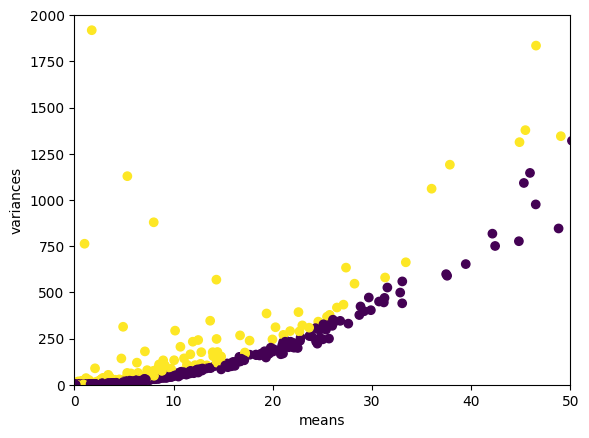

In [19]:
plt.scatter(adata.var["means"], adata.var["variances"], c=adata.var["highly_variable"])
plt.xlabel("means")
plt.ylabel("variances")
plt.xlim((0, 50))
plt.ylim((0, 2000))
plt.show()

In [20]:
presence = pd.Series(data=np.zeros_like(adata.var["means"]), index=adata.var.index)
for gene in list(obs_genes.keys()):
    presence[gene] += 1
adata.var["targeted"] = presence

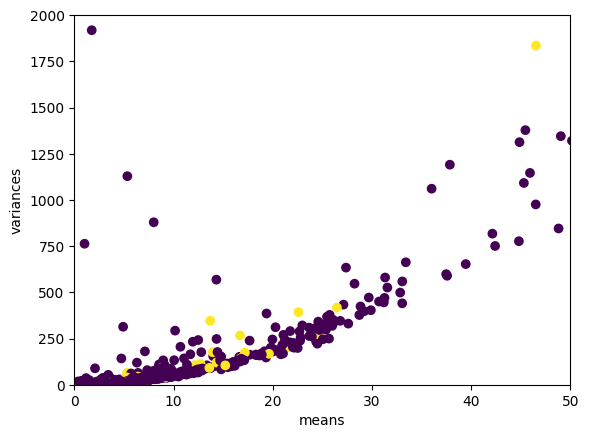

In [21]:
plt.scatter(adata.var["means"], adata.var["variances"], c=adata.var["targeted"])
plt.xlabel("means")
plt.ylabel("variances")
plt.xlim((0, 50))
plt.ylim((0, 2000))
plt.show()

In [22]:
# out of 3000 highly variable genes, and 250 targeted genes, only 96 is in the intersection
(adata.var["highly_variable"] * adata.var["targeted"]).sum()
# for future reference we probably add all intervened genes and complete with highly variable 

100.0

In [23]:
np.unique(adata.obs.condition.values)

array(['Co-culture', 'Control', 'IFNγ'], dtype=object)

In [24]:
# filter genes (1000)
to_keep = np.logical_or(adata.var["highly_variable_rank"] < 1500, adata.var["targeted"])
adata_gf = adata[:, to_keep].copy()

In [35]:
# Loading the preselected genes
chosen_genes = pd.read_csv("chosen_genes.csv")
chosen_genes = chosen_genes.to_numpy().T.squeeze()

In [40]:
# chosen_genes = np.append(chosen_genes, 'ACSL3')

In [42]:
present = 0
final_genes = list()
for gene in chosen_genes:
    if gene.upper() in adata_gf.var[adata.var["targeted"] > 0].index:
        present += 1
        final_genes.append(gene.upper())
    else:
        print(gene.upper())
    
print(present)

61


/scratch/3492673/ipykernel_91598/2067165404.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if gene.upper() in adata_gf.var[adata.var["targeted"] > 0].index:


In [43]:
in_final_gene = list()
for index, row in adata.var.iterrows():
    if index in final_genes:
        in_final_gene.append(True)
    else:
        in_final_gene.append(False)


adata.var["in_final"] = in_final_gene

In [44]:
to_keep = adata.var["in_final"]
adata_gf = adata[:, to_keep].copy()

In [46]:
adata_gf[adata_gf.obs.condition == "Control"].copy().write_h5ad("../../perturb-cite-seq/SCP1064/ready/control/gene_filtered_adata.h5ad")
adata_gf[adata_gf.obs.condition == "Co-culture"].copy().write_h5ad("../../perturb-cite-seq/SCP1064/ready/cocult/gene_filtered_adata.h5ad")
adata_gf[adata_gf.obs.condition == "IFNγ"].copy().write_h5ad("../../perturb-cite-seq/SCP1064/ready/ifn/gene_filtered_adata.h5ad")

In [51]:
adata_small = adata_gf[np.random.choice(np.arange(adata.n_obs), size=10000, replace=False)].copy()
adata_small.write_h5ad("../../perturb_cite_seq_data/SCP1064/other/small_adata.h5ad")